In [6]:
# Setup: Fruit image classification machine learning program
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

plt.style.use('fivethirtyeight')

In [7]:
# Load data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Image classification: deer


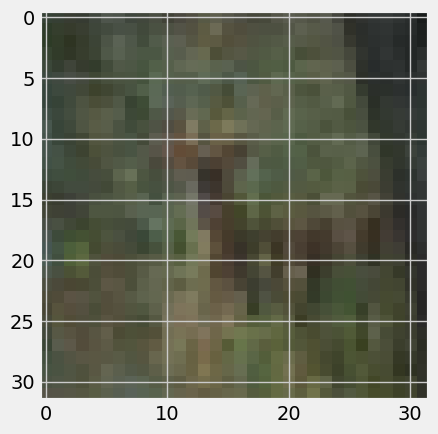

In [8]:
# Show single image

# Get classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

index = 10
img = plt.imshow(x_train[index])
print('Image classification: ' + classification[y_train[index][0]])

In [9]:
# Convert labels to a set of 10 numbers
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
# Normalise pixel values
x_train = x_train / 255
x_test = x_test / 255

In [11]:
# Creating model
model = Sequential()

# Convolution layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32, 32, 3)))

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Another pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Adding 1k neurons 
model.add(Dense(1000, activation='relu'))

# Drop out layer
model.add(Dropout(0.5))

# Adding 500 neurons 
model.add(Dense(500, activation='relu'))

# Drop out layer (again)
model.add(Dropout(0.5))

# Adding 250 neurons 
model.add(Dense(250, activation='relu'))

# Adding 10 neurons 
model.add(Dense(10, activation='softmax'))

In [12]:
# Model compilation
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
# Train model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=256,
                 epochs=10,
                 validation_split=0.2)
# time.sleep() 

Epoch 1/10
157/157 [==============================] - 18s 109ms/step - loss: 1.8066 - accuracy: 0.3255 - val_loss: 1.5614 - val_accuracy: 0.4309
Epoch 2/10
157/157 [==============================] - 17s 108ms/step - loss: 1.4558 - accuracy: 0.4660 - val_loss: 1.3262 - val_accuracy: 0.5239
Epoch 3/10
157/157 [==============================] - 18s 115ms/step - loss: 1.3153 - accuracy: 0.5246 - val_loss: 1.2088 - val_accuracy: 0.5691
Epoch 4/10
157/157 [==============================] - 19s 122ms/step - loss: 1.2209 - accuracy: 0.5626 - val_loss: 1.2068 - val_accuracy: 0.5606
Epoch 5/10
157/157 [==============================] - 18s 113ms/step - loss: 1.1404 - accuracy: 0.5932 - val_loss: 1.1479 - val_accuracy: 0.5916
Epoch 6/10
157/157 [==============================] - 17s 109ms/step - loss: 1.0607 - accuracy: 0.6209 - val_loss: 1.0750 - val_accuracy: 0.6211
Epoch 7/10
157/157 [==============================] - 17s 108ms/step - loss: 1.0024 - accuracy: 0.6458 - val_loss: 1.0256 - val_ac

In [14]:

model.evaluate(x_train, y_train_one_hot)[1]

1563/1563 [==============================] - 11s 7ms/step - loss: 0.7248 - accuracy: 0.7472


0.7471799850463867

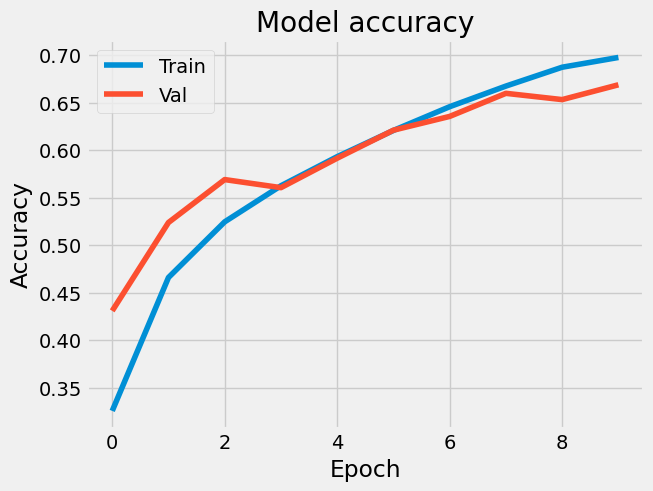

In [15]:
# Visualise model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

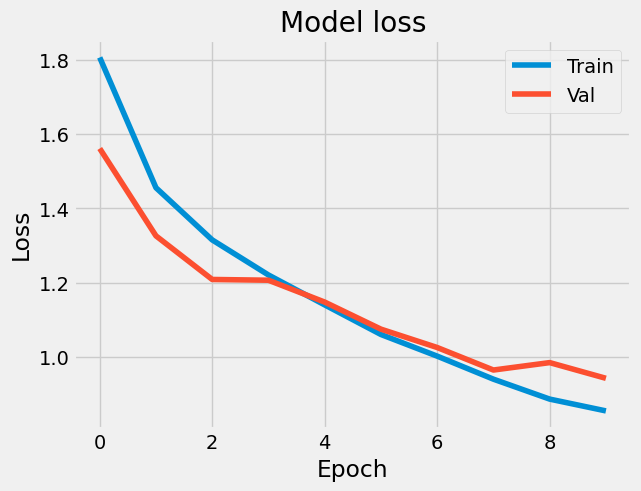

In [16]:
# Visualise model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [17]:
# Google colab upload, if you are running it locally skip this
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Google colab uses this
new_image = plt.imread(uploaded); 

In [18]:
# Local use this
file = './test_animal.png'
new_image = plt.imread(file); 

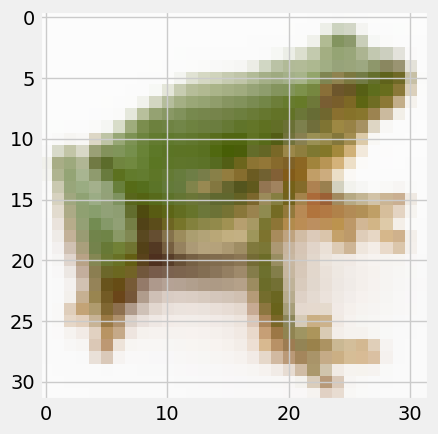

In [19]:
# Resize and show uploaded image
from skimage.transform import resize

resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)



In [20]:
# Get model predications
predications = model.predict(np.array([resized_image]))

predications

1/1 [==============================] - 0s 119ms/step


array([[2.0876641e-05, 2.1444357e-05, 1.1570614e-03, 1.1149414e-03,
        1.9283715e-04, 5.9185779e-05, 9.9737382e-01, 6.4773275e-07,
        1.0558252e-06, 5.8111193e-05]], dtype=float32)

In [21]:
# Process predications
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predications

for i in range(10):
  for j in range(10):
    if (x[0][list_index[i]] > x[0][list_index[j]]):
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
  
# Show sorted predications
print(list_index)



[6, 2, 3, 4, 5, 9, 1, 0, 8, 7]


In [22]:
# Print predications
print('Prediction: ' + classification[list_index[0]])
print('Other (in order):')
for i in range(1,len(list_index)):
  print(classification[list_index[i]])

Prediction: frog
Other (in order):
bird
cat
deer
dog
truck
automobile
airplane
ship
horse
